In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle
from matplotlib.transforms import Affine2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%config InlineBackend.figure_format = 'retina'

In [2]:
stacking_data_0 = np.load("active_data_0m.npy")
stacking_data_130 = np.load("active_data_130m.npy")

In [3]:
NoSensors = 13

In [4]:
funda_mode_a = pd.read_excel('active_data_1.xlsx')
funda_mode_a2 = pd.read_excel('active_data_2.xlsx')
funda_mode_b = pd.read_excel('active_data_130.xlsx')

In [5]:
funda_mode_o = pd.read_excel('1113_mode_obs1.xlsx')

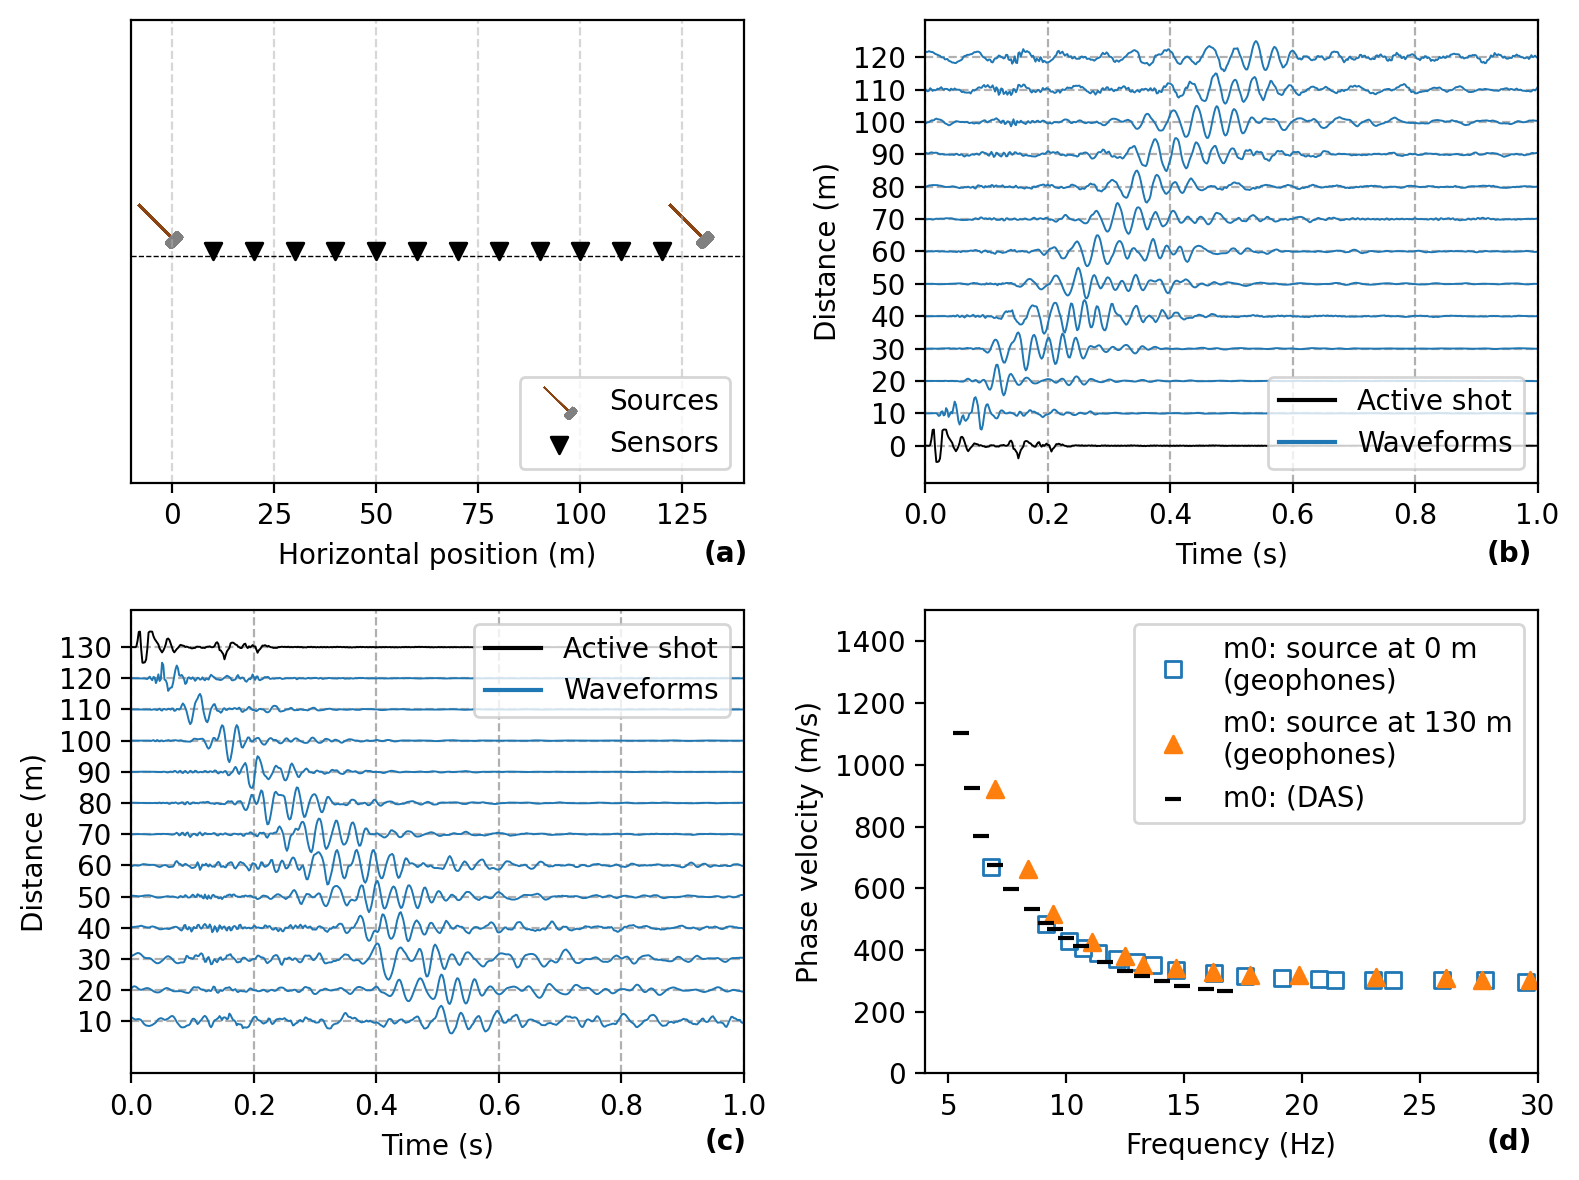

In [6]:
fig, axs = plt.subplots(2,2,figsize = (8,6))

############################## Sensor arrangement #############################################

num_sensors = 12
spacing = 10  # sensor spacing

sensor_positions = [i * spacing + 10 for i in range(num_sensors)]

hammer_position = (-3, 0.006)  # location of hammer
hammer_image = plt.imread("hammer_1.png")  
imagebox = OffsetImage(hammer_image, zoom=0.02)  
ab = AnnotationBbox(imagebox, hammer_position, frameon=False, zorder = 1)

hammer_position = (127, 0.006)  # location of hammer
hammer_image = plt.imread("hammer_1.png")  
imagebox = OffsetImage(hammer_image, zoom=0.02)  
cd = AnnotationBbox(imagebox, hammer_position, frameon=False, zorder = 1)

axs[0,0].add_artist(ab)
axs[0,0].add_artist(cd)
axs[0,0].plot([0,0], [0,0], c = 'w',label='Sources')

axs[0,0].scatter(sensor_positions, [0] * num_sensors, c='k', marker='v', label='Sensors',zorder = 5)
axs[0,0].axhline(-0.001, color='black', linewidth=0.5, linestyle='--')  # show the base line
axs[0,0].set_xlabel("Horizontal position (m)")
axs[0,0].set_yticks([])  # hide y axis ticks
axs[0,0].legend(loc = 'lower right')

hammer_position = (95, -0.036)  # location of hammer
hammer_image = plt.imread("hammer_1.png")  
imagebox = OffsetImage(hammer_image, zoom=0.015)  
ef = AnnotationBbox(imagebox, hammer_position, frameon=False, zorder = 6)
axs[0,0].add_artist(ef)

axs[0,0].grid(True, linestyle='--', alpha=0.5)

axs[0,0].set_xlim(-10,140)

############################## shot at 0 m #############################################

axs[0,1].plot(np.linspace(0,1,int(1.0*500)+1), stacking_data_0[0]/2,lw = 0.7,c = 'k')

for i in range(1,NoSensors):
    axs[0,1].plot(np.linspace(0,1,int(1.0*500)+1), stacking_data_0[i]/2 + i, c = '#1f77b4', lw = 0.7)

axs[0,1].set_xlim(0, 1)
axs[0,1].grid(ls='--')

axs[0,1].plot([0,0],[0,0],c = 'k',label = 'Active shot')
axs[0,1].plot([0,0],[0,0],c = '#1f77b4',label = 'Waveforms')


axs[0,1].set_yticks(np.arange(0, 13, 1))
axs[0,1].set_yticklabels(np.arange(0, 130, 10))
axs[0,1].legend(ncol = 1, loc = 'lower right')

axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_ylabel('Distance (m)')

############################## shot at 130 m #############################################

axs[1,0].plot(np.linspace(0,1,int(1.0*500)+1), stacking_data_0[0]/2 + 13 ,lw = 0.7,c = 'k')

for i in range(1, NoSensors):
    axs[1,0].plot(np.linspace(0,1,int(1.0*500)+1), stacking_data_130[i]/2 + i, c = '#1f77b4', lw = 0.7)

axs[1,0].set_xlim(0, 1)
axs[1,0].grid(ls='--')

axs[1,0].plot([0,0],[0,0],c = 'k',label = 'Active shot')
axs[1,0].plot([0,0],[0,0],c = '#1f77b4',label = 'Waveforms')

# # ax.set_ylim(4000, )
axs[1,0].set_yticks(np.arange(1, 14, 1))
axs[1,0].set_yticklabels(np.arange(10, 140, 10))

axs[1,0].set_xlabel('Time (s)')
axs[1,0].set_ylabel('Distance (m)')
axs[1,0].legend(ncol = 1, loc = 'upper right')


# axs[1,0].legend(ncol = 2, edgecolor = 'k', shadow = True, loc = (0.24,1.02))

############################## dispersion curves #############################################

m0_A = axs[1,1].scatter(funda_mode_a['X'], funda_mode_a['Y'],marker = "s",edgecolor = "tab:blue",c = 'w', label = 'm0: source at 0 m\n(geophones)')
# m1_A = ax.scatter(funda_mode_a2['X'], funda_mode_a2['Y'],marker = "^",label = 'm1 active source at 0 m')

m0_B = axs[1,1].scatter(funda_mode_b['X'], funda_mode_b['Y'],marker = "^",c = 'tab:orange',label = 'm0: source at 130 m\n(geophones)')
m0_O = axs[1,1].scatter(funda_mode_o['X'], funda_mode_o['Y'],marker = "_",c = 'k',label = 'm0: (DAS)')
axs[1,1].set_ylim(0,1500)
axs[1,1].set_xlim(4.025,30)
axs[1,1].legend()

axs[1,1].set_xlabel('Frequency (Hz)')  
axs[1,1].set_ylabel('Phase velocity (m/s)')  


fig.text(0.46, 0.53, '(a)', ha='center', va='center', fontweight='bold')
fig.text(0.95, 0.53, '(b)', ha='center', va='center', fontweight='bold')
fig.text(0.46, 0.04, '(c)', ha='center', va='center', fontweight='bold')
fig.text(0.95, 0.04, '(d)', ha='center', va='center', fontweight='bold')
plt.tight_layout()
# plt.savefig('verify_das.png', dpi=600)

plt.show()